# **DASHBOARD MACHINE LEARNING APPLICATIONS**

------------------------------------------------------
Group participants:
*   *Claudia Sánchez Merino 100475131*
*   *Irina Vela Gómez 100454302*
*   *Mónica Martín Herguedas 100474845*
*   *Lucía Fernández Alba 100475223*




------------------------------------------------------

Let's first load the packages and libraries needed to create the Dashboard

In [1]:
#If using colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%pip install contractions
%pip install gensim


!pip cache purge
!pip uninstall -y numpy
!pip install numpy gensim
!pip install numpy==1.23.5
!pip install gensim==4.3.0

Files removed: 12
Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 48.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
xarray 2025.3.1 requires pandas>=2.1, but you have pandas 2.0.3 which is incompatible.
mizani 0.13.3 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
   ━━━━━━━━━━

ERROR: unknown command "install gensim==4.3.0"


In [3]:
!pip install pandas==2.0.3
import pandas as pd
ruta = '/content/drive/MyDrive/ML_apps/' #iri
#ruta = '/content/drive/MyDrive/ML_apps/' #claudia
#ruta = '/content/drive/MyDrive/ML_apps/' #lucia
#ruta = '' #monica

In [4]:
df = pd.read_csv(ruta + "Data_Clean.csv")

In [5]:
df.head()

,id,number,report,start_year,length,age_numeric,emotion_feature,gender_F,gender_M,processed_text,tokenized_text,labels
0,david,8,"It was nighttime, and cold; I could see my bre...",1990,78,15,AN,False,True,nighttime cold breath outcast friend choose so...,"['nighttime', 'cold', 'breath', 'outcast', 'fr...",5
1,b,0312,"I'm in some strange place, like a carnival or ...",1960,318,22,HA,True,False,strange place carnival party lot people trick ...,"['strange', 'place', 'carnival', 'party', 'lot...",3
2,van,087,"I remember these dreams in continuity, but onl...",2007,290,35,HA,False,True,remember dream continuity relative think deep ...,"['remember', 'dream', 'continuity', 'relative'...",3
3,izzy-all,1693,I had gotten this dog and it was at Nana's. I ...,2003,224,16,SD,True,False,get dog go day lady poppa mom get bed poppa ch...,"['get', 'dog', 'go', 'day', 'lady', 'poppa', '...",2
4,merri,266,I was sitting on a hill trying to fix the lawn...,1999,664,35,AP,True,False,sit hill try fix lawnmower keep trace shape et...,"['sit', 'hill', 'try', 'fix', 'lawnmower', 'ke...",2


In [ ]:
!pip install matplotlib
!pip install seaborn

In [ ]:
# Text preprocessing
import re
import string
import contractions
import nltk
import spacy

# Tokenization & normalization
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Data handling
import pandas as pd
import numpy as np
from collections import Counter


# Vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Topic modeling with Gensim
!pip install gensim
import gensim
from gensim.models import Word2Vec, Doc2Vec, LdaModel
from gensim.models.doc2vec import TaggedDocument
from gensim.models.coherencemodel import CoherenceModel

# Topic visualization
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis


In [8]:
#load English model from SpaCy
print("Loading SpaCy model...")
try:
    nlp = spacy.load('en_core_web_md')
except:
    print("Downloading English model for SpaCy...")
    spacy.cli.download('en_core_web_md')
    nlp = spacy.load('en_core_web_md')


def remove_date_in_parentheses(text):
    if not isinstance(text, str):
        text = str(text)
    pattern = r'\(\d{2}/\d{2}/\d{2}\)'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

def remove_symbols(text):
    cleaned_text = re.sub(r'[\[\]\"()]', '', text)
    return cleaned_text

def clean_text_before_spacy(text):
    #contractions
    text = contractions.fix(text)

    #remove dates inside parentheses
    text = remove_date_in_parentheses(text)

    #remove unwanted symbols
    text = remove_symbols(text)

    #Lowercase the text
    text = text.lower()

    return text


def preprocess_text(text):
    """
    Function to preprocess text using SpaCy
    """
    #clean the text
    text = clean_text_before_spacy(text)

    #processing with SpaCy
    doc = nlp(text)

    #filtered tokens: only words that are not stopwords, are alphabetic,
    # and are nouns, verbs, adjectives or adverbs
    tokens = [token.lemma_ for token in doc
              if not token.is_stop
              and token.is_alpha
              and token.pos_ in ['NOUN', 'VERB', 'ADJ', 'ADV']]

    return " ".join(tokens)

#apply preprocessing to the texts
df['processed_text'] = df['report'].apply(preprocess_text)

#review preprocessing results
print("\nComparison of original vs preprocessed texts:")
for i in range(min(3, len(df))):
    print(f"\nOriginal: {df['report'].iloc[i][:100]}...")
    print(f"Processed: {df['processed_text'].iloc[i][:100]}...")

#save tokenized texts for later use
df['tokenized_text'] = df['processed_text'].apply(lambda x: x.split())

Loading SpaCy model...

Comparison of original vs preprocessed texts:

Original: It was nighttime, and cold; I could see my breath. I was an outcast because the friends I had chosen...
Processed: nighttime cold breath outcast friend choose socially acceptable condemn walk grass concrete unknown ...

Original: I'm in some strange place, like a carnival or a party. There are lots of people. Tricks are played o...
Processed: strange place carnival party lot people trick play dangerous overtone bad taste crowd man son give a...

Original: I remember these dreams in continuity, but only relative to each other. When I think deep enough abo...
Processed: remember dream continuity relative think deep trigger association one remember recent dream tend rem...


In [9]:
import gensim

# 3. Topic modeling with LDA
# --------------------------------------------------
# Create a dictionary and corpus for Gensim
dictionary = gensim.corpora.Dictionary(df['tokenized_text'])
corpus = [dictionary.doc2bow(text) for text in df['tokenized_text']]

# Function to find the optimal number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute coherence for various numbers of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=42,
                         passes=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Calculate coherence for different numbers of topics
model_list, coherence_values = compute_coherence_values(dictionary=dictionary,
                                                        corpus=corpus,
                                                        texts=df['tokenized_text'],
                                                        start=2, limit=40, step=6)

# Find the optimal number of topics
optimal_model_index = coherence_values.index(max(coherence_values))
x = range(2, 40, 6)
optimal_num_topics = x[optimal_model_index]
print(f"\nOptimal number of topics according to coherence: {optimal_num_topics}")

# Train the final LDA model with the optimal number of topics
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=optimal_num_topics,
                     random_state=42,
                     passes=10)


# Create document vector representation with LDA
lda_vectors = []
for doc in corpus:
    topic_probs = lda_model.get_document_topics(doc, minimum_probability=0)
    topic_probs = sorted(topic_probs, key=lambda x: x[0])
    probs = [prob for _, prob in topic_probs]
    lda_vectors.append(probs)

lda_matrix = np.array(lda_vectors)
print(f"LDA matrix dimensions: {lda_matrix.shape}")


Optimal number of topics according to coherence: 20
LDA matrix dimensions: (4000, 20)


In [10]:
df.head()

,id,number,report,start_year,length,age_numeric,emotion_feature,gender_F,gender_M,processed_text,tokenized_text,labels
0,david,8,"It was nighttime, and cold; I could see my bre...",1990,78,15,AN,False,True,nighttime cold breath outcast friend choose so...,"[nighttime, cold, breath, outcast, friend, cho...",5
1,b,0312,"I'm in some strange place, like a carnival or ...",1960,318,22,HA,True,False,strange place carnival party lot people trick ...,"[strange, place, carnival, party, lot, people,...",3
2,van,087,"I remember these dreams in continuity, but onl...",2007,290,35,HA,False,True,remember dream continuity relative think deep ...,"[remember, dream, continuity, relative, think,...",3
3,izzy-all,1693,I had gotten this dog and it was at Nana's. I ...,2003,224,16,SD,True,False,get dog go day lady poppa mom get bed poppa ch...,"[get, dog, go, day, lady, poppa, mom, get, bed...",2
4,merri,266,I was sitting on a hill trying to fix the lawn...,1999,664,35,AP,True,False,sit hill try fix lawnmower keep trace shape et...,"[sit, hill, try, fix, lawnmower, keep, trace, ...",2


# Dashboard

In [11]:
!pip install dash
!pip install dash pandas plotly

<IPython.core.display.Javascript object>

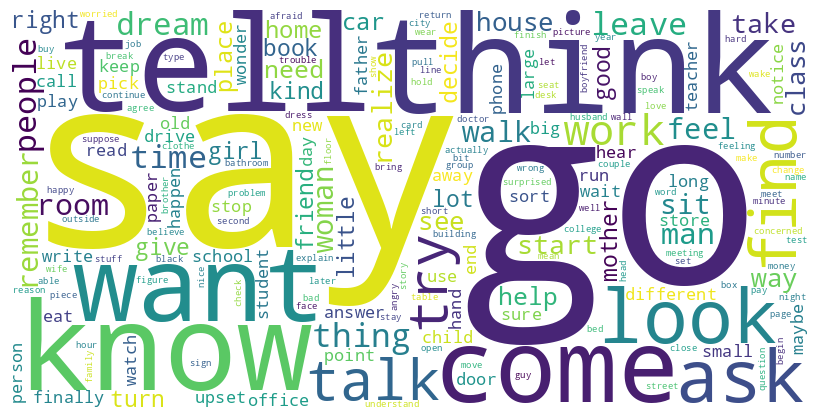

In [56]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import base64
import io

# Ensure the 'start_year' column is numeric
df['start_year'] = df['start_year'].astype(int)

# Get the list of years that exist in the dataset (i.e., no missing data)
years_with_data = sorted(df['start_year'].unique())

# Create marks for the slider, showing each available decade
decades_with_data = sorted(set(year - (year % 10) for year in years_with_data))

marks = {str(year): f"{year}-{year + 9}" for year in decades_with_data}

# Define fixed order of emotions and their full names
emotion_order = ['AN', 'AP', 'SD', 'CO', 'HA']  # Anger, Anxiety, Sadness, Confusion, Positive Emotions
emotion_full_names = {
    'AN': 'Anger',
    'AP': 'Anxiety',
    'SD': 'Sadness',
    'CO': 'Confusion',
    'HA': 'Positive Emotions'
}

# Create topic counts from the LDA matrix (most dominant topic for each document)
topic_assignments = [row.argmax() for row in lda_matrix]  # Get the most probable topic for each document
lda_topic_counts = pd.Series(topic_assignments).value_counts().sort_index()

# Function to update the topic counts for each decade
def get_lda_topic_counts_by_decade(selected_year):
    selected_decade_start = selected_year - (selected_year % 10)
    selected_decade_end = selected_decade_start + 9

    # Filter the documents by the selected decade
    filtered_df = df[(df['start_year'] >= selected_decade_start) & (df['start_year'] <= selected_decade_end)]

    # Get the topic assignment for each document in the selected decade
    topic_assignments_decade = [lda_matrix[i].argmax() for i in filtered_df.index]
    lda_topic_counts_decade = pd.Series(topic_assignments_decade).value_counts().sort_index()

    return lda_topic_counts_decade

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div(children=[
    html.H1(children="Dream Analysis Dashboard", style={'textAlign': 'center', 'font-size': '40px'}),  # Title centered

    # First Row: Decade Slider and both the Emotion Distribution Graph and Pie Chart for LDA Topic Distribution side by side
    html.Div([
        html.Div([
            html.Label('Select Decade:'),
            dcc.Slider(
                id='year-slider',
                min=min(decades_with_data),
                max=max(decades_with_data),
                step=1,
                marks=marks,  # Use decades as marks
                value=min(decades_with_data),  # Default value to the first available year
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),

        # Emotion Distribution Graph on the left
        html.Div([
            dcc.Graph(id='emotion-distribution')
        ], style={'width': '48%', 'display': 'inline-block', 'float': 'left'}),

        # LDA Topic Distribution Pie Chart on the right
        html.Div([
            dcc.Graph(id='lda-topic-distribution')
        ], style={'width': '48%', 'display': 'inline-block', 'float': 'right'}),

    ], style={'width': '100%', 'display': 'flex', 'justify-content': 'space-between'}),

    # Second Row: Gender Dropdown, Dream Length vs Emotion Graph, and Word Cloud
    html.Div([
        html.Div([
            html.Label('Select Gender:'),
            dcc.Dropdown(
                id='gender-dropdown',
                options=[
                    {'label': 'Male', 'value': 'M'},
                    {'label': 'Female', 'value': 'F'},
                ],
                value='M',  # Default value is Male
                style={'width': '30%'}  # Smaller width for the gender dropdown
            ),
        ], style={'width': '48%', 'display': 'inline-block'}),  # Set the width for the gender dropdown

        html.Div([
            dcc.Graph(id='length-vs-emotion')
        ], style={'width': '48%', 'display': 'inline-block', 'float': 'right'}),  # Set the width for the graph

    ], style={'width': '100%', 'display': 'flex', 'justify-content': 'space-between'}),  # Flexbox for better layout

    # Third Row: Word Cloud Selection and Word Cloud Display
    html.Div([
        html.Label('Select Cluster for Word Cloud:'),
        dcc.Dropdown(
            id='label-dropdown',
            options=[{'label': str(label), 'value': label} for label in sorted(df['labels'].unique())],
            value=df['labels'].min(),  # Default value (first label)
            style={'width': '30%'}  # Smaller width for the word cloud label dropdown
        ),
    ], style={'width': '48%', 'display': 'inline-block'}),  # style for layout

    # Word Cloud Display
    html.Div([
        html.H3("Word Cloud for Selected Cluster"),
        html.Img(id='word-cloud', style={'width': '100%', 'height': '50%'})
    ], style={'width': '48%', 'display': 'inline-block'}),

])

# Callback to update the emotion distribution chart by selected decade
@app.callback(
    Output('emotion-distribution', 'figure'),
    [Input('year-slider', 'value')]
)
def update_emotion_distribution(selected_year):
    # Filter to include only the selected decade
    selected_decade_start = selected_year - (selected_year % 10)
    selected_decade_end = selected_decade_start + 9

    filtered_df = df[(df['start_year'] >= selected_decade_start) & (df['start_year'] <= selected_decade_end)]
    emotion_counts = filtered_df['emotion_feature'].value_counts()

    # Reorder emotions to follow the fixed order
    emotion_counts = emotion_counts[emotion_counts.index.isin(emotion_order)].reindex(emotion_order, fill_value=0)

    # Replace abbreviations with full emotion names
    emotion_counts.index = [emotion_full_names[emotion] for emotion in emotion_counts.index]

    fig = px.bar(
        emotion_counts,
        x=emotion_counts.index,
        y=emotion_counts.values,
        labels={'x': 'Emotion', 'y': 'Count'},
        title=f'Emotion Distribution in Dreams (Decade: {selected_decade_start}-{selected_decade_end})'
    )

    return fig

# Callback to update the LDA pie chart by selected decade
@app.callback(
    Output('lda-topic-distribution', 'figure'),
    [Input('year-slider', 'value')]
)
def update_lda_pie_chart(selected_year):
    # Get LDA topic distribution for the selected decade
    lda_topic_counts_decade = get_lda_topic_counts_by_decade(selected_year)

    # Create the updated Pie Chart for LDA Topics
    lda_topic_fig = px.pie(
        names=lda_topic_counts_decade.index,
        values=lda_topic_counts_decade.values,
        title=f'Distribution of Predominant LDA Topics (Decade: {selected_year})',
        labels={'Clusters': 'LDA Topic', 'values': 'Document Count'}
    )
    lda_topic_fig.update_traces(textinfo='percent+label')  # Show percentage and label on pie chart

    return lda_topic_fig

# Callback to update the word cloud for the selected label
@app.callback(
    Output('word-cloud', 'src'),
    [Input('label-dropdown', 'value')]
)
def update_word_cloud(selected_label):
    filtered_df = df[df['labels'] == selected_label]
    text = ' '.join(filtered_df['processed_text'].astype(str).tolist())

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

    # Convert word cloud to image
    plt.figure(figsize=(8, 4), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    # Save image to buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)

    # Encode image to base64
    data_uri = base64.b64encode(buf.read()).decode('utf-8')

    return f'data:image/png;base64,{data_uri}'

# Callback to update the Dream Length vs Emotion (Strip Plot) for selected gender
@app.callback(
    Output('length-vs-emotion', 'figure'),
    [Input('gender-dropdown', 'value')]
)
def update_length_vs_emotion(selected_gender):
    # Filter to include only the selected gender
    if selected_gender == 'M':
        filtered_df = df[df['gender_M'] == True]
    else:
        filtered_df = df[df['gender_F'] == True]

    # Create the strip plot for Dream Length vs Emotion
    fig = px.strip(filtered_df, x='emotion_feature', y='length',
                   category_orders={'emotion_feature': emotion_order},
                   labels={'emotion_feature': 'Emotion', 'length': 'Dream Length (words)'},
                   title=f'Dream Length vs Emotion (Gender: {selected_gender})',
                   stripmode='overlay',  # Overlay mode to show all points
                   color='emotion_feature')  # Color by emotion for better distinction

    # Get the maximum length value across both Male and Female (so that both have the same Y-axis scale)
    max_length = df['length'].max()

    # Set the Y-axis limit for both male and female to the same value
    fig.update_layout(
        yaxis=dict(range=[0, max_length]),  # Ensure that the Y-axis is the same for both graphs
    )

    return fig

if __name__ == '__main__':
    app.run(debug=True)
